In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/sierraleone-bumbuna.csv',parse_dates=['Timestamp'])

Summary Statistics

In [3]:
# Summary Statistics
summary_stats = df.describe()

# Median Calculation (not included in `describe`)
median_values = df.median()

print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)


Summary Statistics:
                            Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50%

Data Quality Check

In [6]:
# Missing values
missing_values = df.isnull().sum()

# Negative values in irradiance columns
negative_values = {
    "GHI": (df["GHI"] < 0).sum(),
    "DNI": (df["DNI"] < 0).sum(),
    "DHI": (df["DHI"] < 0).sum(),
}

print("Missing Values:\n", missing_values)
print("\nNegative Value Counts:\n", negative_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Value Counts:
 {'GHI': np.int64(261135), 'DNI': np.int64(266352), 'DHI': np.int64(263128)}


Time Series Analysis

C:\Users\yayem\AppData\Local\Temp\ipykernel_14456\2802815547.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


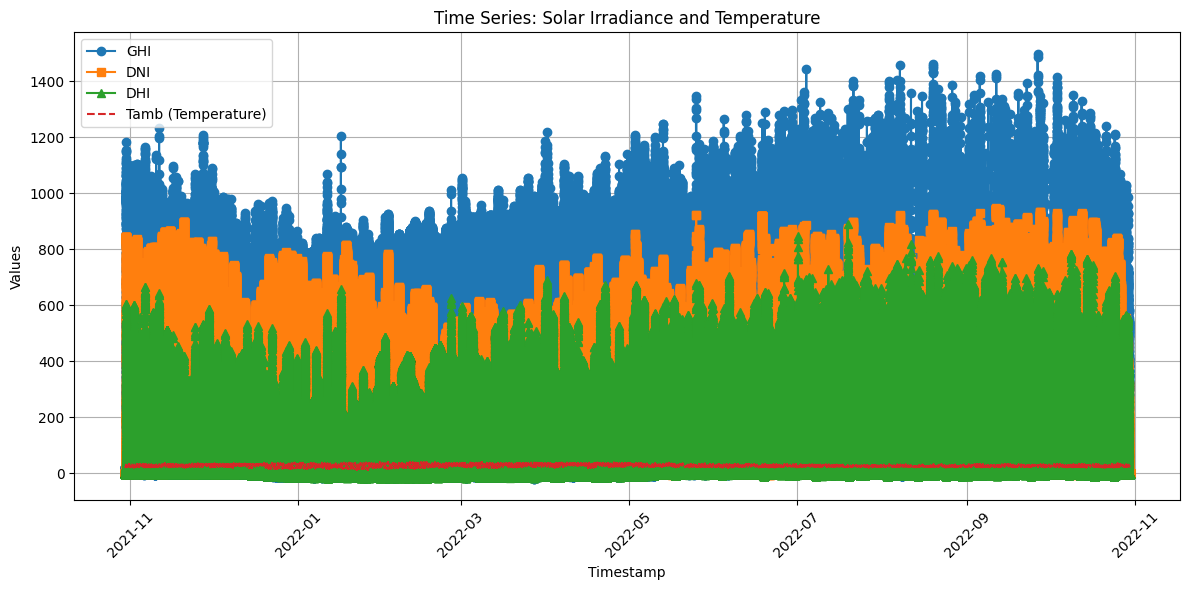

In [7]:
import matplotlib.pyplot as plt

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["GHI"], label="GHI", marker="o")
plt.plot(df["Timestamp"], df["DNI"], label="DNI", marker="s")
plt.plot(df["Timestamp"], df["DHI"], label="DHI", marker="^")
plt.plot(df["Timestamp"], df["Tamb"], label="Tamb (Temperature)", linestyle="--")
plt.title("Time Series: Solar Irradiance and Temperature")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Impact of Cleaning

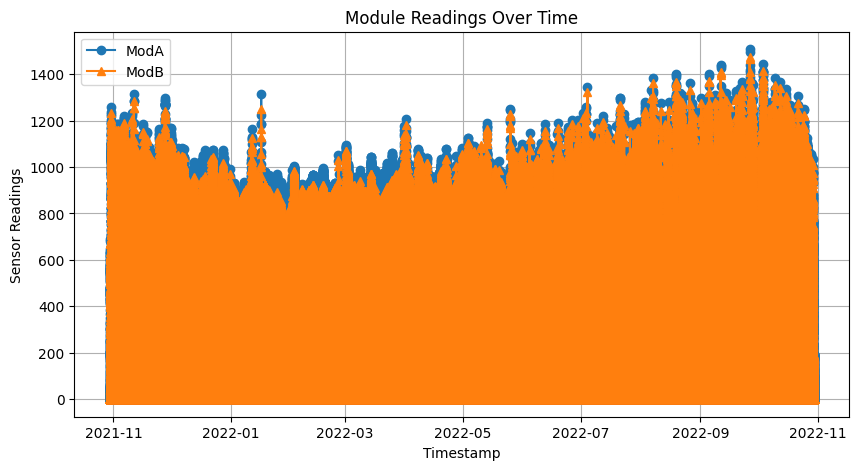

In [8]:
# Comparing ModA and ModB with Cleaning events
df_cleaning = df[df["Cleaning"] > 0]

# Plot ModA and ModB against time
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp"], df["ModA"], label="ModA", marker="o")
plt.plot(df["Timestamp"], df["ModB"], label="ModB", marker="^")
plt.title("Module Readings Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Readings")
plt.legend()
plt.grid()
plt.show()

Correlation Analysis

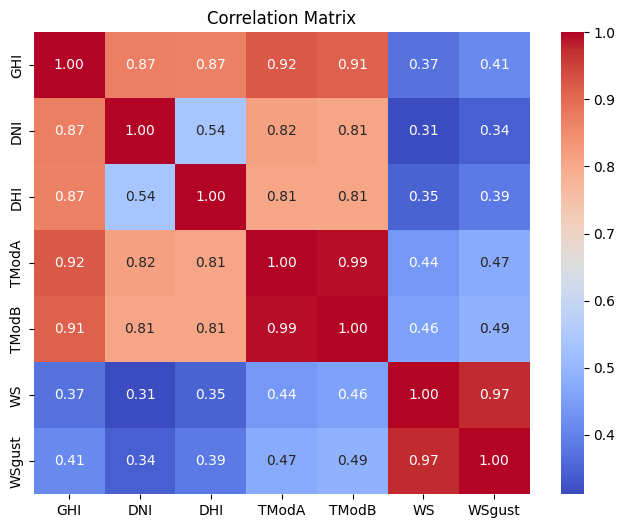

In [15]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[["GHI", "DNI", "DHI", "TModA", "TModB", "WS", "WSgust"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Wind Analysis

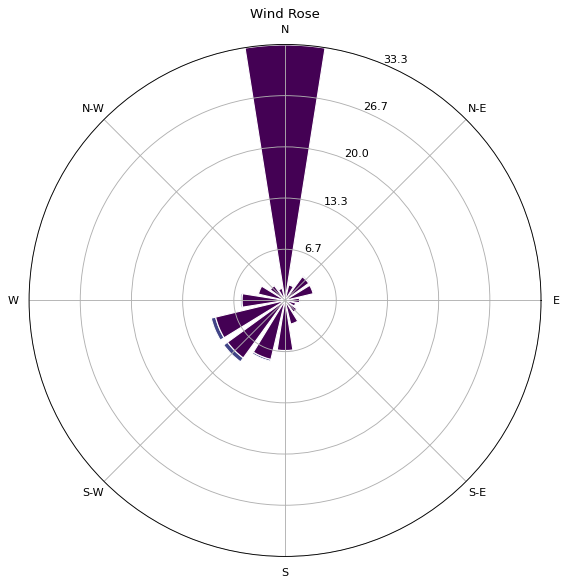

In [10]:
from windrose import WindroseAxes

# Windrose Plot
ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_title("Wind Rose")
plt.show()


Histograms

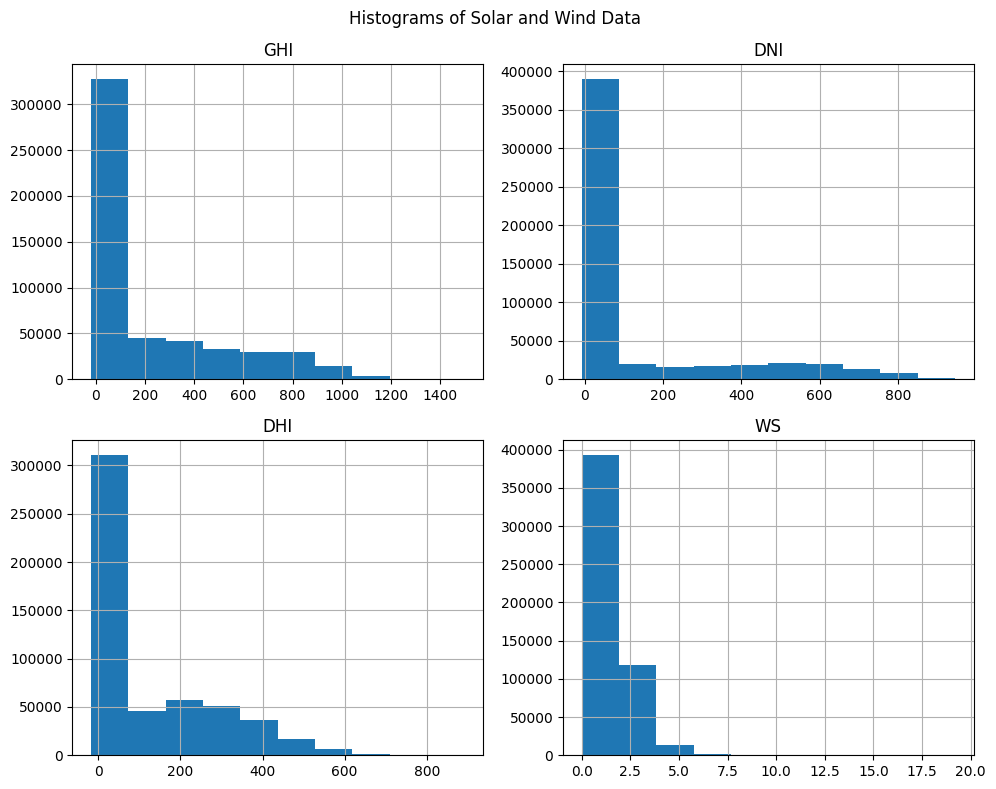

In [14]:
# Histogram for GHI, DNI, DHI, and WS
df[["GHI", "DNI", "DHI", "WS"]].hist(figsize=(10, 8), bins=10)
plt.suptitle("Histograms of Solar and Wind Data")
plt.tight_layout()
plt.show()


Z-Score Analysis

In [12]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df[["GHI", "DNI", "DHI", "Tamb"]].apply(zscore)

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outlier Rows:\n", df[outliers])


Outlier Rows:
                  Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
653    2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  25.9  85.3   
654    2021-10-30 10:55:00  826.0  263.5  599.6  883.0  861.0  26.0  85.4   
655    2021-10-30 10:56:00  851.0  285.0  605.9  912.0  890.0  26.0  84.2   
656    2021-10-30 10:57:00  823.0  254.8  603.9  878.0  856.0  26.0  85.3   
657    2021-10-30 10:58:00  810.0  244.5  598.8  864.0  843.0  26.1  85.7   
...                    ...    ...    ...    ...    ...    ...   ...   ...   
519235 2022-10-25 13:56:00  884.0  808.0  170.5  911.0  892.0  34.7  57.8   
519236 2022-10-25 13:57:00  881.0  804.0  172.1  907.0  889.0  34.5  57.9   
519237 2022-10-25 13:58:00  878.0  801.0  173.4  903.0  885.0  34.5  58.1   
519238 2022-10-25 13:59:00  873.0  795.9  174.4  899.0  880.0  34.5  51.8   
519239 2022-10-25 14:00:00  865.0  786.7  175.5  890.0  872.0  34.4  53.4   

         WS  WSgust  WSstdev     WD  WDstdev    BP  Cleaning

 Bubble Chart

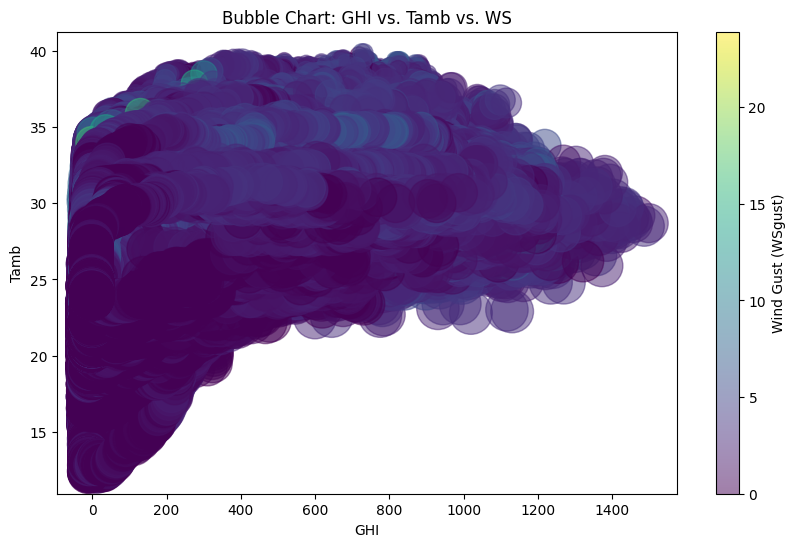

In [13]:
# Bubble chart: GHI vs. Tamb vs. WS with bubble size = RH
plt.figure(figsize=(10, 6))
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"] * 10, alpha=0.5, c=df["WSgust"], cmap="viridis")
plt.colorbar(label="Wind Gust (WSgust)")
plt.title("Bubble Chart: GHI vs. Tamb vs. WS")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()
